In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate
from thinkdsp import read_wave

In [2]:
from thinkdsp import Spectrum

def make_barlett(wave, N, flag=True):
  spectrogram = wave.make_spectrogram(N,flag)
  spec_mac = spectrogram.spec_map.values()

  powers = []
  for spectrum in spec_mac:
    powers.append(spectrum.power)

  hs = np.sqrt(sum(powers)/ len(powers))
  fs = next(iter(spec_mac)).fs

  return Spectrum(hs, fs, wave.framerate)

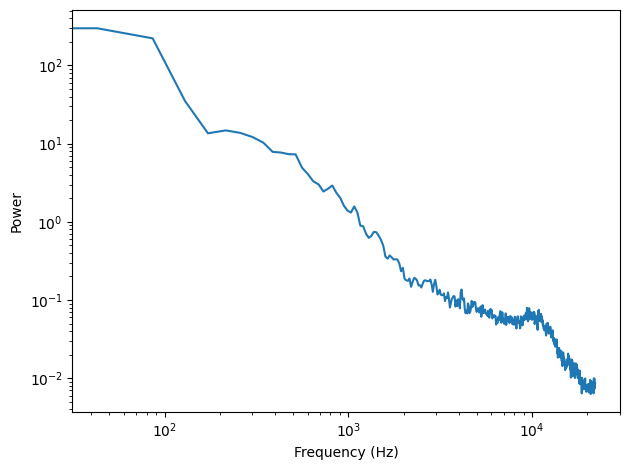

In [4]:
wave = read_wave('sea.wav')
segment = wave.segment(start=6, duration=1.0)
loglog = dict(xscale='log', yscale='log')

barlett = make_barlett(segment,1024)
barlett.plot_power()

decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

Гауссов шум